In [39]:
library(tidyverse)
library(repr)
library(tidymodels)

# INTRODUCTION 
with heart disease becoming an increasingly common and prevalent in the world, it is important to identify how someone might end up with heart disease. This brings us the the important question of how do people's existing health factors affect their chances of obtaining heart disease. With this project I will try and answer this question by correctly identifying which health factors puts you at risk of obtaining heart disease, more specifically, if higher levels of a specific varaible translates to higher risk of heart disease. The dataset I will being using is from cleveland located in the United States of America. I chose this specifically because the US has one of the highest rates of heart disease in the world. 


# METHOD
I will be exploring this question mainly through 4 factors which are age, cholesterol, resting blood pressure, and maximun heart rate achieved upon entering the hospital. I will be using classification in conjunction with these variables to try and predict if a high score in any of these factors will contribute to a higher chance of getting heart disease. I will visualize the results with scatterplots. 

# Expected outcomes and significance:
I expect to find that the higher the variables the higher chance of getting heart disease increases ,inversely, I expect that if the variables are lower it will lower the chance of people getting heart disease.
I believe that these findings can have a great impact in the future and lower the rate of heart disease around the world. Some future questions this could lead to is how can we lower the factors contributing to heart disease now that we know what variables contribute the most towards heart disease.
 



In [40]:

set.seed(20)
project_data <- read_csv("https://raw.githubusercontent.com/yobrap/Dsci-Project/main/data/heart_disease/processed.cleveland.data", col_names = FALSE)

colnames(project_data) <- c("age", "sex", "cp","trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca","thal", "num")

project_data <- mutate(project_data, num = as_factor(num)) 
project_data <- mutate(project_data, num = fct_recode(num, disease = "1",
                                 disease = "2", 
                                 disease = "3",
                                 disease = "4",
                                 clean = "0"))
project_data <- select(project_data, age, chol, trestbps, thalach, num)


Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [41]:
# filter(project_data, age == "?" |   #For identifying missing rows
 #       chol == "?" |
  #      trestbps == "?" |
   #     thalach == "?" |
    #    num == "?" )


# Graph 1

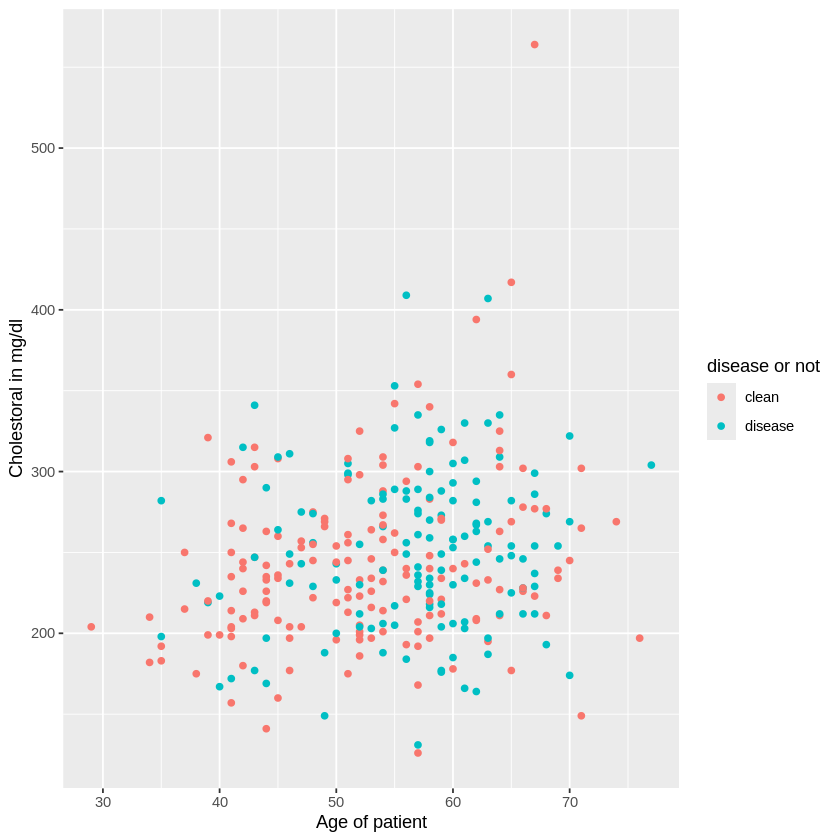

In [42]:
 project_graph <- ggplot(project_data, aes(x = age, y = chol, color = num)) + 
            geom_point() + 
            labs(x = "Age of patient", y = "Cholestoral in mg/dl", color = "disease or not")

project_graph
                  

This table shows the relationship of heart disease relative to age and cholestoral

# Graph 2

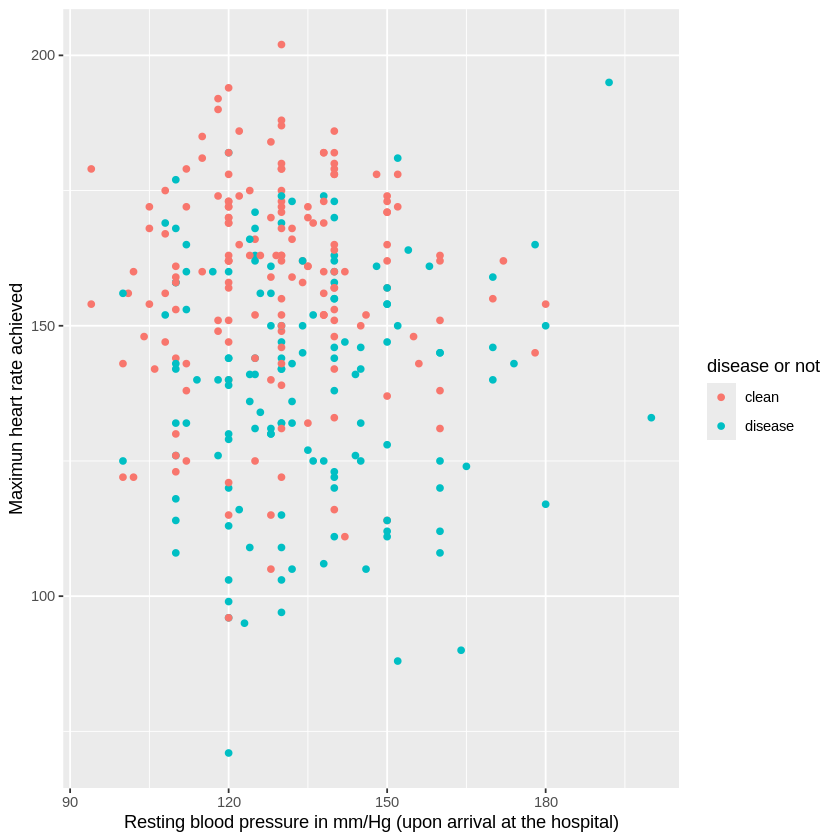

In [43]:
 project_graph <- ggplot(project_data, aes(x = trestbps, y = thalach, color = num)) + 
            geom_point() + 
            labs(x = "Resting blood pressure in mm/Hg (upon arrival at the hospital)",
                 y = "Maximun heart rate achieved", color = "disease or not")

project_graph

This table shows the relationship of heart disease relative to resting blood pressure and maximum heart rate achieved

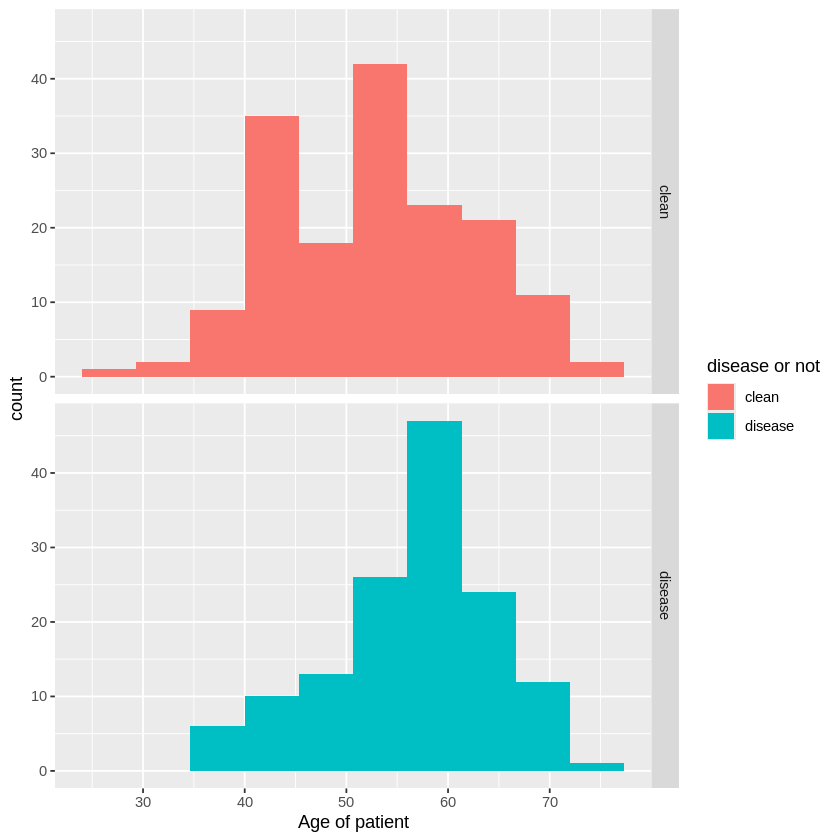

In [45]:
project_graph <- ggplot(project_data, aes(x = age, fill = num)) + 
            geom_histogram(bins = 10) + 
            facet_grid(rows = vars(num)) +
            labs(x = "Age of patient", fill = "disease or not")

project_graph
                  

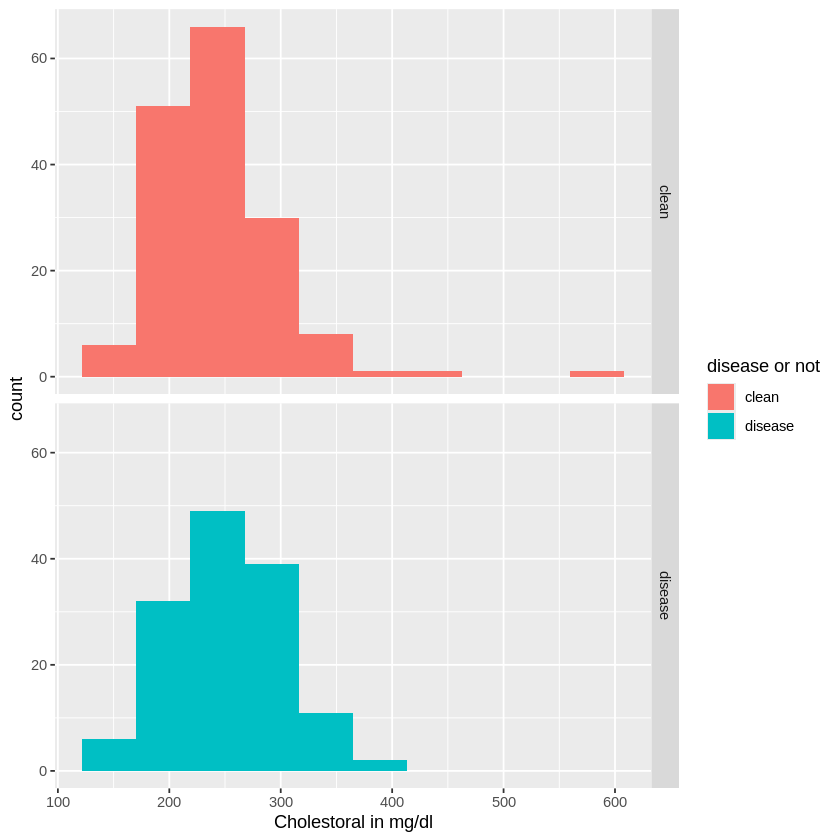

In [46]:
project_graph_2 <- ggplot(project_data, aes(x = chol, fill = num)) + 
            geom_histogram(bins = 10) + 
            facet_grid(rows = vars(num)) +
            labs(x = "Cholestoral in mg/dl", fill = "disease or not")

project_graph_2

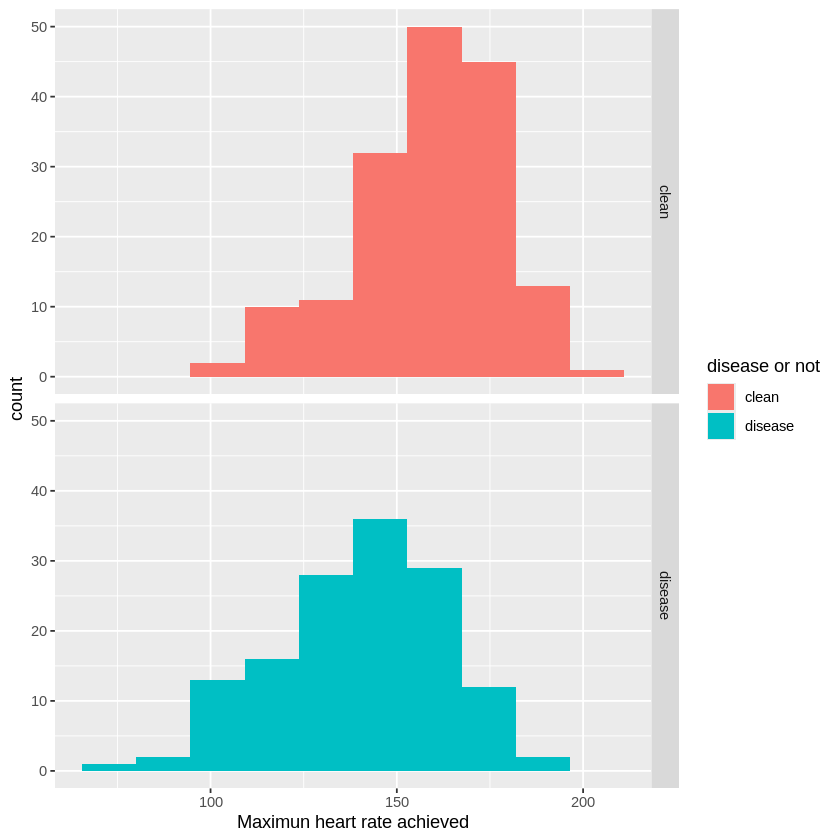

In [47]:
project_graph_3 <- ggplot(project_data, aes(x = thalach, fill = num)) + 
            geom_histogram(bins = 10) + 
            facet_grid(rows = vars(num)) +
            labs(x = "Maximun heart rate achieved", fill = "disease or not")

project_graph_3

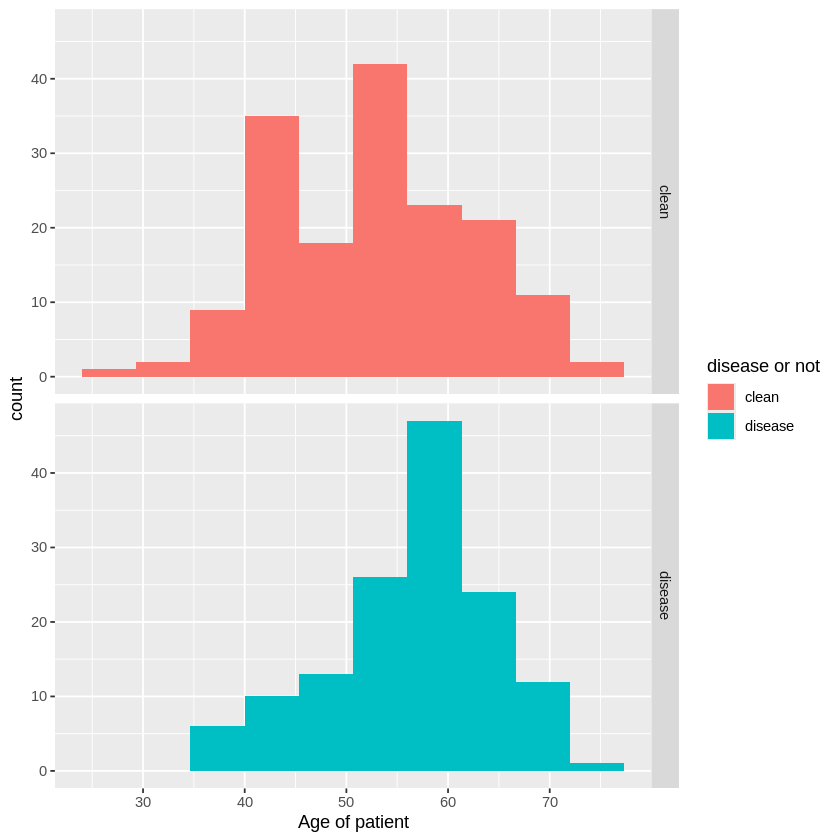

In [48]:
project_graph_4 <- ggplot(project_data, aes(x = age, fill = num)) + 
            geom_histogram(bins = 10) + 
            facet_grid(rows = vars(num)) +
            labs(x = "Age of patient", fill = "disease or not")

project_graph_4

These histograms gives an individual view of how many patients of different variables have heart disease 